In [ ]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

#from __future__ import print_function

In [ ]:
#Load the dataset

data_frame = pd.read_csv("Crop_recommendation.csv")

In [ ]:
data_frame.head()

,N,P,K,temperature,humidity,ph,rainfall,crop_name
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
data_frame.tail()

,N,P,K,temperature,humidity,ph,rainfall,crop_name
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [ ]:
data_frame.shape

(2200, 8)

In [ ]:
data_frame.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall',
       'crop_name'],
      dtype='object')

In [ ]:
data_frame['crop_name'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
data_frame['crop_name'].value_counts()

pigeonpeas     100
chickpea       100
orange         100
blackgram      100
jute           100
papaya         100
maize          100
watermelon     100
pomegranate    100
lentil         100
banana         100
kidneybeans    100
rice           100
coffee         100
grapes         100
muskmelon      100
mungbean       100
mango          100
cotton         100
apple          100
mothbeans      100
coconut        100
Name: crop_name, dtype: int64

In [ ]:
data_frame.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
crop_name       object
dtype: object

In [ ]:
x = data_frame[['N' , 'P' , 'K' , 'temperature' , 'humidity' , 'ph' , 'rainfall']]
y = data_frame['crop_name']
#labels = df['label']

In [ ]:
# Initializing empty lists to append all model's name and corresponding name

algorithm_accuracy = []
algorithm = []

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x , y , test_size = 0.2 , random_state =2)


In [ ]:
#Implementation of Random Forest

from sklearn.ensemble import RandomForestClassifier

Random_Forest = RandomForestClassifier(n_estimators = 20 , random_state = 0)
Random_Forest.fit(x_train , y_train)

y_pred = Random_Forest.predict(x_test)

In [ ]:
#Confusion Matrix

'''ConfusionMatrix = confusion_matrix(y_test , y_pred)
print(ConfusionMatrix)'''
ConfusionMatrix = confusion_matrix(y_test, y_pred)

ConfusionMatrix_dataframe = pd.DataFrame(ConfusionMatrix , index = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'] , columns = ['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'])

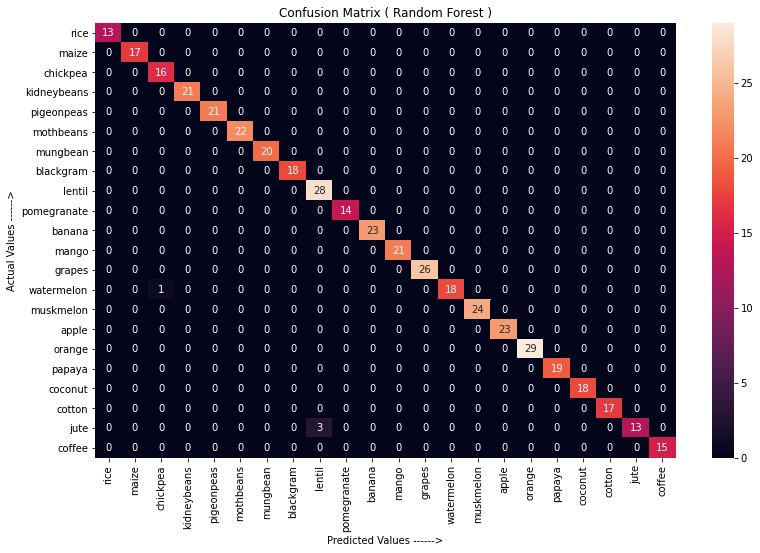

In [ ]:
#Plotting the confusion matrix
plt.figure(figsize=(13,8))
sn.heatmap(ConfusionMatrix_dataframe, annot=True)
plt.title('Confusion Matrix ( Random Forest )')
plt.ylabel('Actual Values ------>')
plt.xlabel('Predicted Values ------>')
plt.show()

In [ ]:
#Accuracy of Random Forest

accuracy = metrics.accuracy_score(y_test , y_pred)

algorithm_accuracy.append(accuracy)
algorithm.append('Random Forest')

print(classification_report(y_test , y_pred))

print("\n Random Forest's Accuracy is", accuracy)



              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        13
      banana       1.00      1.00      1.00        17
   blackgram       0.94      1.00      0.97        16
    chickpea       1.00      1.00      1.00        21
     coconut       1.00      1.00      1.00        21
      coffee       1.00      1.00      1.00        22
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        18
        jute       0.90      1.00      0.95        28
 kidneybeans       1.00      1.00      1.00        14
      lentil       1.00      1.00      1.00        23
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        26
   mothbeans       1.00      0.95      0.97        19
    mungbean       1.00      1.00      1.00        24
   muskmelon       1.00      1.00      1.00        23
      orange       1.00      1.00      1.00        29
      papaya       1.00    

In [ ]:
accuracy_models = dict(zip(algorithm, algorithm_accuracy))
for i, acc in accuracy_models.items():
    print (i, '=', acc,"\n")

Random Forest = 0.990909090909091 



In [ ]:
n_max = data_frame['N'].max()
p_max = data_frame['P'].max()
k_max = data_frame['K'].max()
temp_max = data_frame['temperature'].max()
hum_max = data_frame['humidity'].max()
ph_max = data_frame['ph'].max()
print(n_max, p_max, k_max, temp_max, hum_max, ph_max)

140 145 205 43.67549305 99.98187601 9.93509073


In [ ]:
'''n = int(input("Enter the amount of Nitrogen : "))
p = int(input("Enter the amount of Phosphorus : "))
k = int(input("Enter the amount of Potassium : "))
temp = float(input("Enter the temperature : "))
hum = float(input("Enter the humidity : "))
PH = float(input("Enter the ph value : "))

lst = []
col = data_frame.columns
shape = data_frame.shape               
lst.extend([n, p, k, temp, hum, PH])
#print(len(col) - 2)

c=0                        #counter for checking

if(PH > 0 and PH <= ph_max):        #checking the range of ph value
    i = 0
    while(i < (len(col) - 2)):   
    
        if(lst[i] <= 0 or lst[i] > 100):
            c += 1
        i += 1
else:
    c = 4
    #print("PH is out of range !!!!!!!! ")


if c < 4:                #counter must be less than 4 to give results

    rainfall = 0
    while(rainfall < 12000):

        data2 = np.array([[n,	p,	k,	temp,	hum,	PH, rainfall]])
        prediction = Random_Forest.predict(data2)
        print('For rainfall between ', rainfall, ' to ', (rainfall+100),' = ', prediction)
        rainfall = ( rainfall + 100 )
else:
    print("Values entered by user is out of range !!!!! ")
    
'''

'''
data2 = np.array([[79,	42,	42,	20.130175, 81.604873,7.628473, 262.717340]])
prediction = Random_Forest.predict(data2)
print(prediction)
'''



'\ndata2 = np.array([[79,\t42,\t42,\t20.130175, 81.604873,7.628473, 262.717340]])\nprediction = Random_Forest.predict(data2)\nprint(prediction)\n'

In [ ]:
'''n = int(input("Enter the amount of Nitrogen : "))
p = int(input("Enter the amount of Phosphorus : "))
k = int(input("Enter the amount of Potassium : "))
temp = float(input("Enter the temperature : "))
hum = float(input("Enter the humidity : "))
PH = float(input("Enter the ph value : "))

c = 0

if(PH > 0 and PH <= ph_max):
    if(n <= 0 or n > n_max):
        print("WARNING !!!!  Value of N(Nitrogen) is out of range !!!!!")
        c +=1
    if(p <= 0 or p > p_max):
        print("WARNING !!!!  Value of P(Phosphorus) is out of range !!!!!")
        c +=1
    if(k <= 0 or k > k_max):
        print("WARNING !!!!  Value of K(Potassium) is out of range !!!!!")
        c +=1
    if(temp <= 0 or temp > temp_max):
        print("WARNING !!!!  Value of temperature is out of range !!!!!")
        c +=1
    if(hum <= 0 or hum > hum_max):
        print("WARNING !!!!  Value of humidity is out of range !!!!!")
        c +=1
else:
    print("WARNING !!!!  Value of PH is out of range !!!!!")
    c = 4

if c < 4:                #counter must be less than 4 to give results

    rainfall = 0
    while(rainfall < 12000):

        data2 = np.array([[n,	p,	k,	temp,	hum,	PH, rainfall]])
        prediction = Random_Forest.predict(data2)
        print('For rainfall between ', rainfall, ' to ', (rainfall+100),' = ', prediction)
        rainfall = ( rainfall + 100 )
else:
    print("Values entered by user is out of range !!!!! ")

 '''   

'n = int(input("Enter the amount of Nitrogen : "))\np = int(input("Enter the amount of Phosphorus : "))\nk = int(input("Enter the amount of Potassium : "))\ntemp = float(input("Enter the temperature : "))\nhum = float(input("Enter the humidity : "))\nPH = float(input("Enter the ph value : "))\n\nc = 0\n\nif(PH > 0 and PH <= ph_max):\n    if(n <= 0 or n > n_max):\n        print("WARNING !!!!  Value of N(Nitrogen) is out of range !!!!!")\n        c +=1\n    if(p <= 0 or p > p_max):\n        print("WARNING !!!!  Value of P(Phosphorus) is out of range !!!!!")\n        c +=1\n    if(k <= 0 or k > k_max):\n        print("WARNING !!!!  Value of K(Potassium) is out of range !!!!!")\n        c +=1\n    if(temp <= 0 or temp > temp_max):\n        print("WARNING !!!!  Value of temperature is out of range !!!!!")\n        c +=1\n    if(hum <= 0 or hum > hum_max):\n        print("WARNING !!!!  Value of humidity is out of range !!!!!")\n        c +=1\nelse:\n    print("WARNING !!!!  Value of PH is ou

In [ ]:
n = int(input("Enter the amount of Nitrogen : "))
print()
if(n <= 0 or n > n_max):
    print("WARNING !!!!  Value of N(Nitrogen) is out of range !!!!!")
    print()
p = int(input("Enter the amount of Phosphorus : "))
print()
if(p <= 0 or p > p_max):
    print("WARNING !!!!  Value of P(Phosphorus) is out of range !!!!!")
    print()
k = int(input("Enter the amount of Potassium : "))
print()
if(k <= 0 or k > k_max):
    print("WARNING !!!!  Value of K(Potassium) is out of range !!!!!")
    print("\n")
temp = float(input("Enter the temperature : "))
print()
if(temp <= 0 or temp > temp_max):
    print("WARNING !!!!  Value of temperature is out of range !!!!!")
    print("\n")
hum = float(input("Enter the humidity : "))
print()
if(hum <= 0 or hum > hum_max):
    print("WARNING !!!!  Value of humidity is out of range !!!!!")
    print("\n")
PH = float(input("Enter the ph value : "))
print()
if(PH <= 0 or PH > ph_max):
    print("WARNING !!!!  Value of PH is out of range !!!!!")
    print("\n")
c = 0

if(n <= 0 or n > n_max):
    c +=1
if(p <= 0 or p > p_max):
    c +=1
if(k <= 0 or k > k_max):
    c +=1
if(temp <= 0 or temp > temp_max):
    c +=1
if(hum <= 0 or hum > hum_max):
    c +=1
if(PH <= 0 or PH > ph_max):
    c +=1

if c < 4:                #counter must be less than 4 to give results

    rainfall = 0
    while(rainfall < 12000):

        data2 = np.array([[n,	p,	k,	temp,	hum,	PH, rainfall]])
        prediction = Random_Forest.predict(data2)
        print('For rainfall between ', rainfall, ' to ', (rainfall+100),' = ', prediction)
        rainfall = ( rainfall + 100 )
else:
    print("Values entered by user is out of range !!!!! ")


WARNING !!!!  Value of N(Nitrogen) is out of range !!!!!




WARNING !!!!  Value of temperature is out of range !!!!!




In [ ]:
from sklearn.tree import plot_tree

rf_small = RandomForestClassifier(n_estimators=10, max_depth=3)
#rf_small = RandomForestClassifier(n_estimators=10)
rf_small.fit(x_train , y_train)


In [ ]:
tree_small = rf_small.estimators_[5]

fig = plt.figure(figsize=(15,10))
plot_tree(rf_small.estimators_[0], filled='True' , impurity='True', rounded='True')

In [ ]:
fig.savefig("Random_Forest.png")